**Ensemble Techniques**

Building a model that predicts if someone who seeks a loan might be a defaulter or a non-defaulter. We have several independent variables like, checking account balance, credit history, purpose, loan amount etc. For more details on the dataset, please see source at https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image

In [2]:
df = pd.read_csv('credit.csv')
print(df.shape)
df.head()

(1000, 17)


,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [4]:
df.columns

Index(['checking_balance', 'months_loan_duration', 'credit_history', 'purpose',
       'amount', 'savings_balance', 'employment_duration', 'percent_of_income',
       'years_at_residence', 'age', 'other_credit', 'housing',
       'existing_loans_count', 'job', 'dependents', 'phone', 'default'],
      dtype='object')

In [5]:
# Converting columns with object data type to categorical

for feature in df.columns:
    if df[feature].dtype == 'object':
        df[feature] = pd.Categorical(df[feature])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   checking_balance      1000 non-null   category
 1   months_loan_duration  1000 non-null   int64   
 2   credit_history        1000 non-null   category
 3   purpose               1000 non-null   category
 4   amount                1000 non-null   int64   
 5   savings_balance       1000 non-null   category
 6   employment_duration   1000 non-null   category
 7   percent_of_income     1000 non-null   int64   
 8   years_at_residence    1000 non-null   int64   
 9   age                   1000 non-null   int64   
 10  other_credit          1000 non-null   category
 11  housing               1000 non-null   category
 12  existing_loans_count  1000 non-null   int64   
 13  job                   1000 non-null   category
 14  dependents            1000 non-null   int64   
 15  phone

In [6]:
# Checking the categorical columns

print(df.checking_balance.value_counts())
print(df.credit_history.value_counts())
print(df.purpose.value_counts())
print(df.savings_balance.value_counts())
print(df.employment_duration.value_counts())
print(df.other_credit.value_counts())
print(df.housing.value_counts())
print(df.job.value_counts())
print(df.phone.value_counts())
print(df.default.value_counts())

unknown       394
< 0 DM        274
1 - 200 DM    269
> 200 DM       63
Name: checking_balance, dtype: int64
good         530
critical     293
poor          88
very good     49
perfect       40
Name: credit_history, dtype: int64
furniture/appliances    473
car                     337
business                 97
education                59
renovations              22
car0                     12
Name: purpose, dtype: int64
< 100 DM         603
unknown          183
100 - 500 DM     103
500 - 1000 DM     63
> 1000 DM         48
Name: savings_balance, dtype: int64
1 - 4 years    339
> 7 years      253
4 - 7 years    174
< 1 year       172
unemployed      62
Name: employment_duration, dtype: int64
none     814
bank     139
store     47
Name: other_credit, dtype: int64
own      713
rent     179
other    108
Name: housing, dtype: int64
skilled       630
unskilled     200
management    148
unemployed     22
Name: job, dtype: int64
no     596
yes    404
Name: phone, dtype: int64
no     700
yes  

In [7]:
# Categorical columns where there is some order values

replaceStruct = {
    'checking_balance': {'< 0 DM': 1, '1 - 200 DM': 2, '> 200 DM': 3, 'unknown': -1},
    'credit_history': {'critical': 1, 'poor': 2, 'good': 3, 'very good': 4, 'perfect': 5},
    'savings_balance': {'< 100 DM': 1, '100 - 500 DM': 2, '500 - 1000 DM': 3, '> 1000 DM': 4, 'unknown': -1},
    'employment_duration': {'unemployed': 1, '< 1 year': 2, '1 - 4 years': 3, '4 - 7 years': 4, '> 7 years': 5},
    'phone': {'no': 1, 'yes': 2},
    'default': {'no': 0, 'yes': 1}
}

In [8]:
df=df.replace(replaceStruct)

In [9]:
# Categorical columns where there is NOT order values

other_columns = ['purpose', 'housing', 'other_credit', 'job']

In [10]:
df = pd.get_dummies(df, columns=other_columns)

In [11]:
df.head()

,checking_balance,months_loan_duration,credit_history,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,existing_loans_count,...,housing_other,housing_own,housing_rent,other_credit_bank,other_credit_none,other_credit_store,job_management,job_skilled,job_unemployed,job_unskilled
0,1,6,1,1169,-1,5,4,4,67,2,...,0,1,0,0,1,0,0,1,0,0
1,2,48,3,5951,1,3,2,2,22,1,...,0,1,0,0,1,0,0,1,0,0
2,-1,12,1,2096,1,4,2,3,49,1,...,0,1,0,0,1,0,0,0,0,1
3,1,42,3,7882,1,4,2,4,45,1,...,1,0,0,0,1,0,0,1,0,0
4,1,24,2,4870,1,3,3,4,53,2,...,1,0,0,0,1,0,0,1,0,0


**Splitting the data**


In [12]:
X = df.drop('default', axis=1)
y = df['default']

In [13]:
y

0      0
1      1
2      0
3      0
4      1
      ..
995    0
996    0
997    0
998    1
999    0
Name: default, Length: 1000, dtype: category
Categories (2, int64): [0, 1]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

**Ensemble Technique - Decision tree model**

In [15]:
# Building our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. Other option include 'entropy'.

dTree = DecisionTreeClassifier(criterion='gini', random_state=42)

In [16]:
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [17]:
from os import system

train_char_label = ['No', 'Yes']
Credit_Tree_File = open('credit_tree.dot','w')
dot_data = tree.export_graphviz(dTree, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))
Credit_Tree_File.close()

#Works only if "dot" command works on you machine

retCode = system("dot -Tpng credit_tree.dot -o credit_tree.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("credit_tree.png"))

system command returning error: 1


To see the graph we must paste the contents of that file in the following link: http://webgraphviz.com/

In [18]:
# Probably the model is overfitting

dTree.score(X_train, y_train)

1.0

In [19]:
# The model doesn't perform so well in the test data

dTree.score(X_test, y_test)

0.6666666666666666

**Pruning to reduce the overfitting (regularization**)

In [20]:
dTree2 = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
dTree2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [21]:
# Looks like that it is not overfitting anymore

dTree2.score(X_train, y_train)

0.7614285714285715

In [22]:
# Now we have a better performance with the test sample

dTree2.score(X_test, y_test)

0.7333333333333333

In [23]:
train_char_label = ['No', 'Yes']
Credit_Tree_File2 = open('credit_tree2.dot','w')
dot_data = tree.export_graphviz(dTree2, out_file=Credit_Tree_File2, feature_names = list(X_train), class_names = list(train_char_label))
Credit_Tree_File2.close()

retCode = system("dot -Tpng credit_tree2.dot -o credit_tree2.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("credit_tree2.png"))

system command returning error: 1


To see the graph we must paste the contents of that file in the following link: http://webgraphviz.com/

In [24]:
# Looking at the importance of features in the tree building (The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance).

print (pd.DataFrame(dTree2.feature_importances_, columns = ["Importance"], index = X_train.columns).sort_values(ascending=False, by='Importance'))

                              Importance
checking_balance                0.432665
months_loan_duration            0.167051
credit_history                  0.139038
employment_duration             0.100192
other_credit_none               0.056386
purpose_furniture/appliances    0.055003
age                             0.049665
job_unemployed                  0.000000
job_skilled                     0.000000
job_management                  0.000000
other_credit_store              0.000000
other_credit_bank               0.000000
housing_rent                    0.000000
housing_own                     0.000000
housing_other                   0.000000
purpose_renovations             0.000000
purpose_car0                    0.000000
purpose_education               0.000000
purpose_car                     0.000000
purpose_business                0.000000
phone                           0.000000
dependents                      0.000000
existing_loans_count            0.000000
years_at_residen

In [25]:
y_predict = dTree2.predict(X_test)
y_predict

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0], d

0.7333333333333333


<AxesSubplot:>

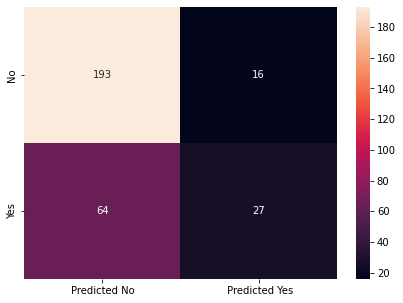

In [26]:
print(dTree2.score(X_test, y_test))

cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ['No','Yes']],
                  columns = [i for i in ['Predicted No',' Predicted Yes']])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

**Ensemble Technique - Bagging**

Builds on complex models and helps to avoid Overfitting. It samples the dataset to feed to each weak learner in parallel and uses voting mechanism to provide the final output.

In [27]:
# We choose the decision tree model which was overfitting (dTree) and build 50 different models (n_estimator)

from sklearn.ensemble import BaggingClassifier

bagging_cl = BaggingClassifier(base_estimator=dTree, n_estimators=50, random_state=42)

In [28]:
bagging_cl.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  n_estimators=50, random_state=42)

In [30]:
y_predict = bagging_cl.predict(X_test)
y_predict

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1], d

0.7366666666666667


<AxesSubplot:>

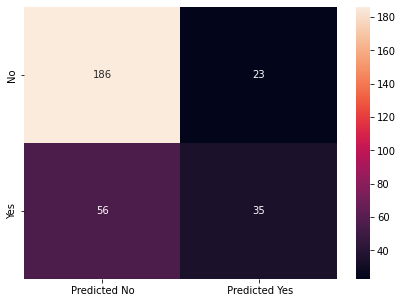

In [32]:
print(bagging_cl.score(X_test, y_test))

cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ['No','Yes']],
                  columns = [i for i in ['Predicted No',' Predicted Yes']])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [34]:
# Using bagging with a less complex model (dTree2) we have decreased the performance of the model

bagging_cl2 = BaggingClassifier(base_estimator=dTree2, n_estimators=50, random_state=42)

bagging_cl2.fit(X_train, y_train)
y_predict = bagging_cl2.predict(X_test)

print(bagging_cl2.score(X_test, y_test))

0.7166666666666667
